In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from collections import defaultdict
import datetime
import csv
from math import ceil
import numpy as np
from collections import defaultdict
%matplotlib inline

Field Description

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


C/A      = Control Area (A002)<br >
UNIT     = Remote Unit for a station (R051)<br >
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)<br >
STATION  = Represents the station name the device is located at<br >
LINENAME = Represents all train lines that can be boarded at this station<br >
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.<br >
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   <br >
DATE     = Represents the date (MM-DD-YY)<br >
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event<br >
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)<br >
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities.
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered.
ENTRIES  = The comulative entry register value for a device<br >
EXIST    = The cumulative exit register value for a device<br >


 ### Benson Challenges


#### Challenge 1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}


In [2]:
with open('turnstile.txt') as f:
    reader = list(csv.reader(f))
    data = [[cell.strip() for cell in row] for row in reader]
assert data.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [3]:
def key_type_dict(raw_data, key_list):    
    reading = {}
    if len(key_list)==1:
        for row in raw_data:
            reading.setdefault(row[key_list[0]],[]).append(tuple(row[4:]))
    else:
        for row in raw_data:
            reading.setdefault(tuple([row[i] for i in key_list]),[]).append(tuple(row[4:]))
    return reading

In [4]:
turnstile = key_type_dict(data,[0,1,2,3])
list(turnstile.items())[:2]

[(('R247', 'R178', '01-00-01', '77 ST'),
  [('6',
    'IRT',
    '06/18/2016',
    '01:00:00',
    'REGULAR',
    '0006224123',
    '0023731157'),
   ('6',
    'IRT',
    '06/18/2016',
    '05:00:00',
    'REGULAR',
    '0006224151',
    '0023731211'),
   ('6',
    'IRT',
    '06/18/2016',
    '09:00:00',
    'REGULAR',
    '0006224216',
    '0023731405'),
   ('6',
    'IRT',
    '06/18/2016',
    '13:00:00',
    'REGULAR',
    '0006224326',
    '0023731959'),
   ('6',
    'IRT',
    '06/18/2016',
    '17:00:00',
    'REGULAR',
    '0006224510',
    '0023732526'),
   ('6',
    'IRT',
    '06/18/2016',
    '21:00:00',
    'REGULAR',
    '0006224671',
    '0023732990'),
   ('6',
    'IRT',
    '06/19/2016',
    '01:00:00',
    'REGULAR',
    '0006224811',
    '0023733248'),
   ('6',
    'IRT',
    '06/19/2016',
    '05:00:00',
    'REGULAR',
    '0006224844',
    '0023733302'),
   ('6',
    'IRT',
    '06/19/2016',
    '09:00:00',
    'REGULAR',
    '0006224879',
    '0023733412'),
   ('

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [5]:
def cumulative_counts(reading_dict):
    return {key: sorted([(datetime.datetime.strptime(date + time, '%m/%d/%Y%X'),int(entries))
                        for _, _, date, time, _, entries, _ in data])
                       for key, data in sorted(reading_dict.items())}

In [6]:
turnstile_cumulative_counts = cumulative_counts(turnstile)
list(turnstile_cumulative_counts.items())[:5]

[(('R247', 'R178', '01-00-01', '77 ST'),
  [(datetime.datetime(2016, 6, 4, 1, 0), 6209299),
   (datetime.datetime(2016, 6, 4, 5, 0), 6209318),
   (datetime.datetime(2016, 6, 4, 9, 0), 6209368),
   (datetime.datetime(2016, 6, 4, 13, 0), 6209482),
   (datetime.datetime(2016, 6, 4, 17, 0), 6209720),
   (datetime.datetime(2016, 6, 4, 21, 0), 6209901),
   (datetime.datetime(2016, 6, 5, 1, 0), 6210038),
   (datetime.datetime(2016, 6, 5, 5, 0), 6210065),
   (datetime.datetime(2016, 6, 5, 9, 0), 6210114),
   (datetime.datetime(2016, 6, 5, 13, 0), 6210208),
   (datetime.datetime(2016, 6, 5, 17, 0), 6210358),
   (datetime.datetime(2016, 6, 5, 21, 0), 6210483),
   (datetime.datetime(2016, 6, 6, 1, 0), 6210577),
   (datetime.datetime(2016, 6, 6, 5, 0), 6210592),
   (datetime.datetime(2016, 6, 6, 9, 0), 6210720),
   (datetime.datetime(2016, 6, 6, 13, 0), 6210864),
   (datetime.datetime(2016, 6, 6, 17, 0), 6211279),
   (datetime.datetime(2016, 6, 6, 21, 0), 6211656),
   (datetime.datetime(2016, 6, 7

In [7]:
def key_counts(cumulative_reading): 
    for data in cumulative_reading.values():
        assert data == sorted(data)

    return {key: [[data[i][0], data[i+1][1] - data[i][1], data[i+1][0] - data[i][0]] 
                      for i in range(len(data) - 1)]
              for key, data in cumulative_reading.items()}

In [8]:
turnstile_counts = key_counts(turnstile_cumulative_counts)
list(turnstile_counts.items())[:20]

[(('R247', 'R178', '01-00-01', '77 ST'),
  [[datetime.datetime(2016, 6, 4, 1, 0), 19, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 4, 5, 0), 50, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 4, 9, 0), 114, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 4, 13, 0), 238, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 4, 17, 0), 181, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 4, 21, 0), 137, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 5, 1, 0), 27, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 5, 5, 0), 49, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 5, 9, 0), 94, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 5, 13, 0), 150, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 5, 17, 0), 125, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 5, 21, 0), 94, datetime.timedelta(0, 14400)],
   [datetime.datetime(2016, 6, 6, 1

#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [9]:
def date_counts(counts_dict):
    return [tuple([key,dt.date(),count]) 
            for key, data in counts_dict.items() 
            for dt,count,_ in data]

In [10]:
turnstile_by_date = date_counts(turnstile_counts)
(turnstile_by_date)[:50]

[(('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 4), 19),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 4), 50),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 4), 114),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 4), 238),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 4), 181),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 4), 137),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 5), 27),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 5), 49),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 5), 94),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 5), 150),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 5), 125),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 5), 94),
 (('R247', 'R178', '01-00-01', '77 ST'), datetime.date(2016, 6, 6), 15),
 (('R247', 'R178', '01-00-01', '77 ST'), date

In [74]:
def date_summation(counts_dict,count_filter=500000, for_plot=False):
    all_counts = [tuple([key,dt.date(),count]) 
                  for key, data in counts_dict.items() 
                     for dt,count,_ in data]
    
    udays = sorted(set((dt for _,dt,_ in all_counts)))


    day_counts = {k : [0,]*len(udays) for k,d,_ in all_counts}
    bad_counts = {k : [0,]*len(udays) for k,d,_ in all_counts}
    #{k : [0,]*len(udays) for k,d,_ in all_coun
    i = 0
    for k,dt,c in sorted(all_counts,key = lambda x : x[1]):
        if count_filter<=abs(c):
            bad_counts[k][i]+=c
        elif udays[i]==dt:
            day_counts[k][i]+=c
        else:
            i+=1
    if for_plot == True:
        return day_counts
    elif for_plot == 'bad':
        return {k : v for k,v in bad_counts.items() if sum(v)!=0}
    else:
        return {k : tuple(zip(udays,v)) for k, v in list(day_counts.items())}

In [80]:
turnstile_date_count = date_summation(turnstile_counts)
list(turnstile_date_count.items())[:50]

[(('R247', 'R178', '01-00-01', '77 ST'),
  ((datetime.date(2016, 6, 4), 739),
   (datetime.date(2016, 6, 5), 512),
   (datetime.date(2016, 6, 6), 1231),
   (datetime.date(2016, 6, 7), 1261),
   (datetime.date(2016, 6, 8), 1268),
   (datetime.date(2016, 6, 9), 1214),
   (datetime.date(2016, 6, 10), 1130),
   (datetime.date(2016, 6, 11), 600),
   (datetime.date(2016, 6, 12), 681),
   (datetime.date(2016, 6, 13), 1231),
   (datetime.date(2016, 6, 14), 1221),
   (datetime.date(2016, 6, 15), 1212),
   (datetime.date(2016, 6, 16), 1151),
   (datetime.date(2016, 6, 17), 1132),
   (datetime.date(2016, 6, 18), 660),
   (datetime.date(2016, 6, 19), 543),
   (datetime.date(2016, 6, 20), 1039),
   (datetime.date(2016, 6, 21), 1163),
   (datetime.date(2016, 6, 22), 1154),
   (datetime.date(2016, 6, 23), 1139),
   (datetime.date(2016, 6, 24), 733))),
 (('N094', 'R029', '01-00-02', 'WORLD TRADE CTR'),
  ((datetime.date(2016, 6, 4), 576),
   (datetime.date(2016, 6, 5), 328),
   (datetime.date(2016, 6,

#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

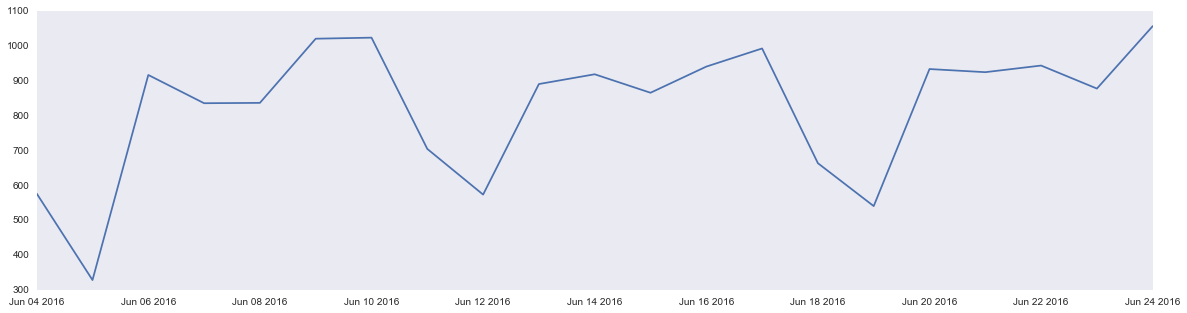

In [90]:
udays = sorted(set((dt for _,dt,_ in turnstile_by_date)))
sns.set_style("dark")
plt.figure(figsize=(20,5))
sns.plt.plot(udays,date_summation(turnstile_counts,10000,True)[('N094', 'R029', '01-00-02', 'WORLD TRADE CTR')])
plt.show()


#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [18]:
combo_date_count = {(k[0],k[1],k[3]) : [] for k, v in date_summation(turnstile_counts,10000,True).items()}
for k,v in date_summation(turnstile_counts,10000,True).items():
    combo_date_count[(k[0],k[1],k[3])].append(np.array(v))
for k,v in combo_date_count.items():
    counts = np.zeros([1,len(udays)])
    for i in combo_date_count[k]:
        counts += i
    combo_date_count[k] = list(zip(udays,counts.tolist()[0]))
list(combo_date_count.items())[:2]

[(('R604', 'R108', 'BOROUGH HALL'),
  [(datetime.date(2016, 6, 4), 3566.0),
   (datetime.date(2016, 6, 5), 2308.0),
   (datetime.date(2016, 6, 6), 10026.0),
   (datetime.date(2016, 6, 7), 9996.0),
   (datetime.date(2016, 6, 8), 10458.0),
   (datetime.date(2016, 6, 9), 10632.0),
   (datetime.date(2016, 6, 10), 9559.0),
   (datetime.date(2016, 6, 11), 4395.0),
   (datetime.date(2016, 6, 12), 3532.0),
   (datetime.date(2016, 6, 13), 10028.0),
   (datetime.date(2016, 6, 14), 10645.0),
   (datetime.date(2016, 6, 15), 10450.0),
   (datetime.date(2016, 6, 16), 10119.0),
   (datetime.date(2016, 6, 17), 9383.0),
   (datetime.date(2016, 6, 18), 3244.0),
   (datetime.date(2016, 6, 19), 2172.0),
   (datetime.date(2016, 6, 20), 9679.0),
   (datetime.date(2016, 6, 21), 10106.0),
   (datetime.date(2016, 6, 22), 9958.0),
   (datetime.date(2016, 6, 23), 9669.0),
   (datetime.date(2016, 6, 24), 8314.0)]),
 (('R253', 'R181', '110 ST'),
  [(datetime.date(2016, 6, 4), 2651.0),
   (datetime.date(2016, 6, 5)

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [19]:
station_date_count = {k[3] : [] for k, v in date_summation(turnstile_counts,10000,True).items()}

for k,v in date_summation(turnstile_counts,10000,True).items():
    station_date_count[k[3]].append(np.array(v))

for k,v in station_date_count.items():
    counts = np.zeros([1,len(udays)])
    for i in station_date_count[k]:
        counts += i
    station_date_count[k] = list(zip(udays,counts.tolist()[0]))

list(station_date_count.items())[:2]

[('RECTOR ST',
  [(datetime.date(2016, 6, 4), 8269.0),
   (datetime.date(2016, 6, 5), 5683.0),
   (datetime.date(2016, 6, 6), 16898.0),
   (datetime.date(2016, 6, 7), 17727.0),
   (datetime.date(2016, 6, 8), 17146.0),
   (datetime.date(2016, 6, 9), 18341.0),
   (datetime.date(2016, 6, 10), 17608.0),
   (datetime.date(2016, 6, 11), 7570.0),
   (datetime.date(2016, 6, 12), 5899.0),
   (datetime.date(2016, 6, 13), 16122.0),
   (datetime.date(2016, 6, 14), 17396.0),
   (datetime.date(2016, 6, 15), 17616.0),
   (datetime.date(2016, 6, 16), 17943.0),
   (datetime.date(2016, 6, 17), 17498.0),
   (datetime.date(2016, 6, 18), 12179.0),
   (datetime.date(2016, 6, 19), 8391.0),
   (datetime.date(2016, 6, 20), 16597.0),
   (datetime.date(2016, 6, 21), 17536.0),
   (datetime.date(2016, 6, 22), 17734.0),
   (datetime.date(2016, 6, 23), 17941.0),
   (datetime.date(2016, 6, 24), 16224.0)]),
 ('NEREID AV',
  [(datetime.date(2016, 6, 4), 2299.0),
   (datetime.date(2016, 6, 5), 1409.0),
   (datetime.date

#### Challenge 7

Plot the time series for a station.

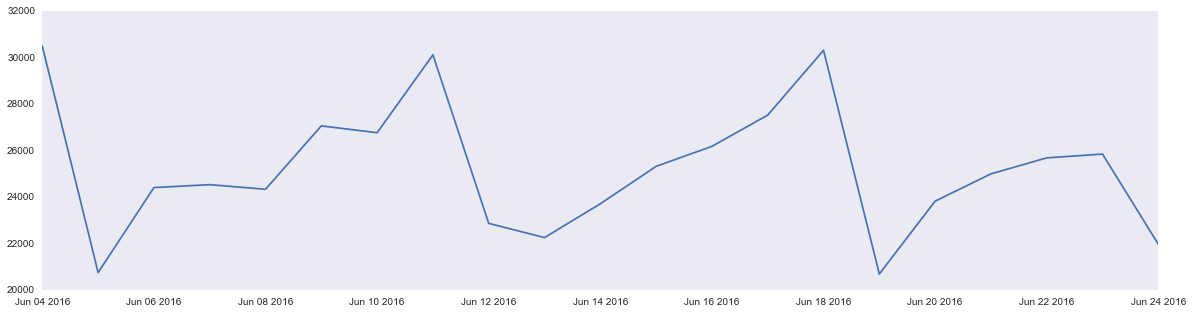

In [20]:
udays = sorted(set((dt for _,dt,_ in turnstile_by_date)))
sns.set_style("dark")
plt.figure(figsize=(20,5))
sns.plt.plot(udays,[x[1] for x in station_date_count[('BEDFORD AV')]])
plt.show()

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [21]:
def week_summation(date_sum):
    week_counts = {k : [] for k,v in date_sum.items()}
    for k,v in date_sum.items():
        week = []
        for i,c in enumerate(v):
            if i+1 in range(7,len(v)+7,7):
                week.append(c)
                week_counts[k].append(week)
                week = []
            else:
                week.append(c)
        
    return week_counts

In [22]:
station_week_count = week_summation(station_date_count)
list(station_week_count.items())[:50]

[('RECTOR ST',
  [[(datetime.date(2016, 6, 4), 8269.0),
    (datetime.date(2016, 6, 5), 5683.0),
    (datetime.date(2016, 6, 6), 16898.0),
    (datetime.date(2016, 6, 7), 17727.0),
    (datetime.date(2016, 6, 8), 17146.0),
    (datetime.date(2016, 6, 9), 18341.0),
    (datetime.date(2016, 6, 10), 17608.0)],
   [(datetime.date(2016, 6, 11), 7570.0),
    (datetime.date(2016, 6, 12), 5899.0),
    (datetime.date(2016, 6, 13), 16122.0),
    (datetime.date(2016, 6, 14), 17396.0),
    (datetime.date(2016, 6, 15), 17616.0),
    (datetime.date(2016, 6, 16), 17943.0),
    (datetime.date(2016, 6, 17), 17498.0)],
   [(datetime.date(2016, 6, 18), 12179.0),
    (datetime.date(2016, 6, 19), 8391.0),
    (datetime.date(2016, 6, 20), 16597.0),
    (datetime.date(2016, 6, 21), 17536.0),
    (datetime.date(2016, 6, 22), 17734.0),
    (datetime.date(2016, 6, 23), 17941.0),
    (datetime.date(2016, 6, 24), 16224.0)]]),
 ('NEREID AV',
  [[(datetime.date(2016, 6, 4), 2299.0),
    (datetime.date(2016, 6, 5), 

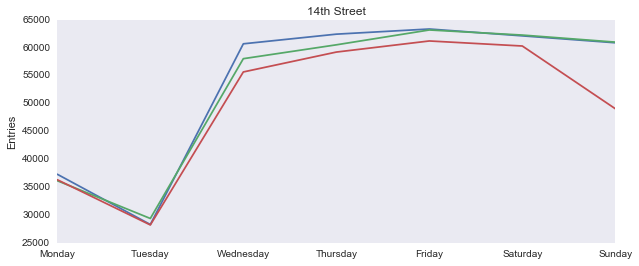

In [23]:
fig = plt.figure(figsize=(10,4))

for week in station_week_count['14 ST']:
    sns.plt.title('14th Street')
    sns.plt.ylabel('Entries')
    sns.plt.xticks(range(0,len(week)),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
    sns.plt.plot(range(0,len(week)),[day[1] for day in week])
plt.show()

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [45]:
def total_weekday_entries(date_sums):
    total_dict = {k : [0,]*7 for k,v in date_sums.items()}
    for key,values in date_sums.items():        
        for day in values[0]:
            index = day[0].weekday()
            total_dict[key][index] += day[1] 
    return total_dict
total_weekday_entries(station_week_count)

{'1 AV': [23514.0, 25061.0, 26442.0, 24517.0, 26240.0, 19486.0, 14506.0],
 '103 ST': [33094.0, 34219.0, 35059.0, 34211.0, 35121.0, 21861.0, 16114.0],
 '103 ST-CORONA': [20476.0,
  20679.0,
  20546.0,
  20480.0,
  21236.0,
  10967.0,
  7415.0],
 '104 ST': [3543.0, 3355.0, 3502.0, 3258.0, 3535.0, 1884.0, 1266.0],
 '110 ST': [13686.0, 13742.0, 13553.0, 12721.0, 13848.0, 8552.0, 5969.0],
 '111 ST': [16862.0, 16984.0, 17467.0, 16661.0, 17109.0, 11204.0, 7599.0],
 '116 ST': [37705.0, 38557.0, 38248.0, 37039.0, 40090.0, 23786.0, 17692.0],
 '116 ST-COLUMBIA': [13867.0,
  14511.0,
  14379.0,
  14822.0,
  12481.0,
  6983.0,
  5130.0],
 '121 ST': [2636.0, 2560.0, 2600.0, 2218.0, 2628.0, 1686.0, 1265.0],
 '125 ST': [77130.0, 77671.0, 76263.0, 76270.0, 71207.0, 67842.0, 38620.0],
 '135 ST': [22151.0, 22848.0, 22606.0, 21848.0, 22836.0, 12404.0, 9205.0],
 '137 ST CITY COL': [14474.0,
  14497.0,
  14644.0,
  14257.0,
  14524.0,
  9488.0,
  7137.0],
 '138/GRAND CONC': [3652.0, 3898.0, 3803.0, 3588.0, 

In [62]:
total_entries = sorted([tuple((k,sum(v))) for k,v in total_weekday_entries(station_week_count).items()]
    ,key = lambda x : x[1],reverse = True)
total_entries

[('34 ST-PENN STA', 1051682.0),
 ('GRD CNTRL-42 ST', 942211.0),
 ('34 ST-HERALD SQ', 727653.0),
 ('86 ST', 699164.0),
 ('14 ST-UNION SQ', 695768.0),
 ('23 ST', 681130.0),
 ('TIMES SQ-42 ST', 611662.0),
 ('59 ST', 520964.0),
 ('42 ST-PORT AUTH', 516427.0),
 ('FULTON ST', 508888.0),
 ('125 ST', 485003.0),
 ('96 ST', 482776.0),
 ('59 ST COLUMBUS', 458102.0),
 ('CHAMBERS ST', 404008.0),
 ('CANAL ST', 398898.0),
 ('FLUSHING-MAIN', 387546.0),
 ('14 ST', 374859.0),
 ('47-50 STS ROCK', 361306.0),
 ('72 ST', 332275.0),
 ('JKSN HT-ROOSVLT', 326938.0),
 ('50 ST', 319926.0),
 ('28 ST', 318123.0),
 ('WALL ST', 293165.0),
 ('ATL AV-BARCLAY', 275496.0),
 ('W 4 ST-WASH SQ', 275338.0),
 ('8 AV', 267663.0),
 ('42 ST-BRYANT PK', 266078.0),
 ('77 ST', 264308.0),
 ('7 AV', 245444.0),
 ('145 ST', 243141.0),
 ('JAY ST-METROTEC', 242693.0),
 ('CHURCH AV', 236664.0),
 ('JAMAICA CENTER', 235096.0),
 ('116 ST', 233117.0),
 ('LEXINGTON AV/53', 232273.0),
 ('BOROUGH HALL', 221767.0),
 ('PATH WTC', 211310.0),
 ('10

#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

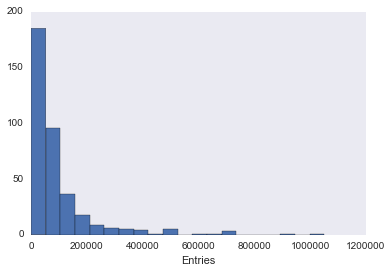

In [65]:
sns.plt.hist([x[1] for x in total_entries], bins = 20)
plt.xlabel('Entries')
plt.show()